# Neural Networks

In [1]:
import pandas as pd

df = pd.read_csv("data/holiday_rental_consumer_segmentation.csv")

print(df.head())
print(df.shape)

   Price   Size  Bedroom  Bathroom  Floor Car_Parking Internet Location Pet  \
0  420.0  292.5        3         1      2         Yes       No   Area_2  No   
1  660.0  208.0        3         1      1         Yes       No   Area_1  No   
2  660.0  194.0        3         2      2         Yes       No   Area_3  No   
3  838.0  240.0        3         1      1         Yes       No   Area_1  No   
4  900.0  360.0        3         2      1         Yes       No   Area_4  No   

  Event  
0   Spa  
1   Spa  
2   Spa  
3   Spa  
4   Spa  
(191, 10)


In [2]:
df["Event"].value_counts()

Event
Spa                   116
Shows                  55
Outdoor activities     20
Name: count, dtype: int64

In [3]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df.loc[df["Event"] == "Spa", :]
df_minority_1 = df.loc[df["Event"] == "Shows", :]
df_minority_2 = df.loc[df["Event"] == "Outdoor activities", :]

# Upsample minority class
df_minority_upsampled_1 = resample(
    df_minority_1,
    replace=True,  # sample with replacement
    n_samples=116,  # to match majority class
    random_state=0,
)  # reproducible results

df_minority_upsampled_2 = resample(
    df_minority_2,
    replace=True,  # sample with replacement
    n_samples=116,  # to match majority class
    random_state=0,
)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat(
    [df_majority, df_minority_upsampled_1, df_minority_upsampled_2]
)

# Display new class counts
df_upsampled["Event"].value_counts()

Event
Spa                   116
Shows                 116
Outdoor activities    116
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        191 non-null    float64
 1   Size         191 non-null    float64
 2   Bedroom      191 non-null    int64  
 3   Bathroom     191 non-null    int64  
 4   Floor        191 non-null    int64  
 5   Car_Parking  191 non-null    object 
 6   Internet     191 non-null    object 
 7   Location     191 non-null    object 
 8   Pet          191 non-null    object 
 9   Event        191 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 15.1+ KB


In [5]:
for col, col_dtype in zip(df.columns, df.dtypes):
    print(
        "====\n Variable: {0:} \n Data type: {1:} \n Unique values: {2:} \n".format(
            col, col_dtype, df[col].unique()
        )
    )

====
 Variable: Price 
 Data type: float64 
 Unique values: [ 420.   660.   838.   900.   450.   485.   659.   440.   617.   545.
  665.   700.   570.   680.   950.   560.   600.   670.   510.   325.
  350.   470.   550.   639.   555.   780.   580.  1630.  1235.   599.
  790.  1250.   730.   635.   750.   945.  1065.  1160.  1170.   400.
  572.5  610.   800.   370.   620.  1300.   529.   480.   525.   500.
  699.   447.   575.   520.   539.   695.   720.   925.  1383.   785.
  708.   260.   645.   710.   462.   630.   649.   745.   650.   769.
  990.  1240.  1060.  1550.  1410.   595.   685.   860.  1750.  1200.
  820.   850.  1220.   840.   970.  1125.  1400.   747.   789.   869.
  770.   807.5  829.   760.   775.   870.   875.   890.  1000.   917.
 1745.   611.   585.5 1049.   749.   795.  1209.   476.   490.   605.
  930.   885.   880.   895.   955.   590.   715.   719.   589. ] 

====
 Variable: Size 
 Data type: float64 
 Unique values: [292.5  208.   194.   240.   360.   199.3  2

In [6]:
df.head()

,Price,Size,Bedroom,Bathroom,Floor,Car_Parking,Internet,Location,Pet,Event
0,420.0,292.5,3,1,2,Yes,No,Area_2,No,Spa
1,660.0,208.0,3,1,1,Yes,No,Area_1,No,Spa
2,660.0,194.0,3,2,2,Yes,No,Area_3,No,Spa
3,838.0,240.0,3,1,1,Yes,No,Area_1,No,Spa
4,900.0,360.0,3,2,1,Yes,No,Area_4,No,Spa


In [7]:
df_features = pd.get_dummies(df.iloc[:, :-1], drop_first=True)
df_features.head()

,Price,Size,Bedroom,Bathroom,Floor,Car_Parking_Yes,Internet_Yes,Location_Area_2,Location_Area_3,Location_Area_4,Pet_Yes
0,420.0,292.5,3,1,2,True,False,True,False,False,False
1,660.0,208.0,3,1,1,True,False,False,False,False,False
2,660.0,194.0,3,2,2,True,False,False,True,False,False
3,838.0,240.0,3,1,1,True,False,False,False,False,False
4,900.0,360.0,3,2,1,True,False,False,False,True,False


In [8]:
x = df_features.to_numpy()
print(x)

[[420.0 292.5 3 ... False False False]
 [660.0 208.0 3 ... False False False]
 [660.0 194.0 3 ... True False False]
 ...
 [660.0 250.5 3 ... False False False]
 [589.0 303.0 2 ... False False False]
 [710.0 384.3 3 ... False False False]]


In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df["Event"])
print(le.classes_)
y = le.transform(df["Event"])
print(y)

['Outdoor activities' 'Shows' 'Spa']
[2 2 2 2 2 0 2 2 0 0 2 0 2 1 2 2 2 1 0 2 2 2 1 2 0 2 2 2 0 2 2 2 2 0 0 2 1
 2 2 2 1 1 1 2 1 1 1 1 2 1 1 2 2 2 2 1 2 2 2 1 2 2 2 0 2 1 0 0 2 2 2 2 2 2
 1 1 1 1 0 0 2 1 0 2 2 2 0 0 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 1 1 1 2 1
 2 1 1 1 2 1 2 2 2 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 1 1 2 1 2 2 2 2 2 2 1 2 2
 2 2 2 2 1 1 2 2 0 2 1 2 1 1 2 2 1 1 1 2 2 2 2 2 0 2 2 1 2 2 2 1 2 1 2 2 1
 2 2 1 2 0 2]


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

price = x[:, 0].reshape(-1, 1)

min_max = MinMaxScaler()
min_max.fit(price)
price_minmax = min_max.transform(price)

standard_scaler = StandardScaler()
standard_scaler.fit(price)
price_standard_scaler = standard_scaler.transform(price)

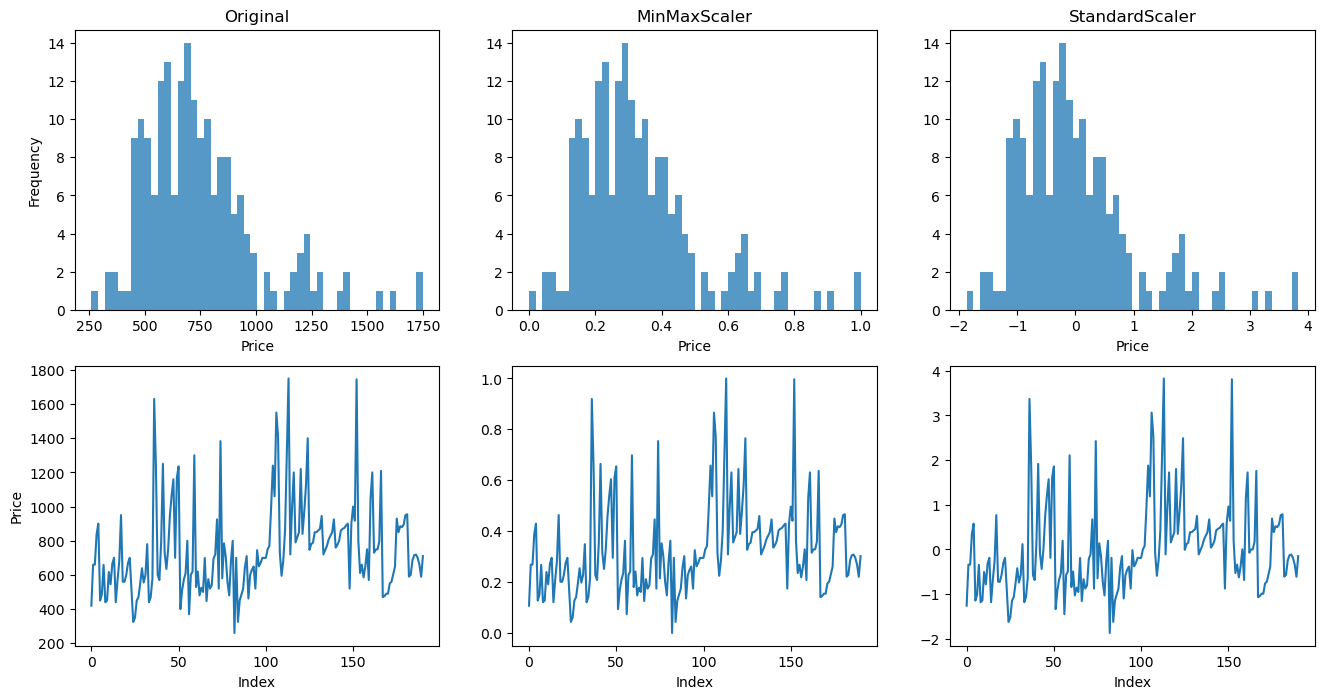

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig = plt.figure(figsize=[16, 8])


plt.subplot(2, 3, 1)
plt.hist(price, bins=50, alpha=0.75)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Original")


plt.subplot(2, 3, 2)
plt.hist(price_minmax, bins=50, alpha=0.75)
plt.xlabel("Price")
plt.title("MinMaxScaler")


plt.subplot(2, 3, 3)
plt.hist(price_standard_scaler, bins=50, alpha=0.75)
plt.xlabel("Price")
plt.title("StandardScaler")


plt.subplot(2, 3, 4)
plt.plot(range(len(price)), price)
plt.xlabel("Index")
plt.ylabel("Price")


plt.subplot(2, 3, 5)
plt.plot(range(len(price_minmax)), price_minmax)
plt.xlabel("Index")

plt.subplot(2, 3, 6)
plt.plot(range(len(price_standard_scaler)), price_standard_scaler)
plt.xlabel("Index")

plt.show()

In [12]:
min_max = StandardScaler()
min_max.fit(x[:, :5])
x[:, :5] = min_max.transform(x[:, :5])

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, random_state=100, stratify=y
)

In [14]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=100, max_iter=10000)
mlp_clf.fit(x_train, y_train)

MLPClassifier(max_iter=10000, random_state=100)

In [15]:
y_predproba_train = mlp_clf.predict_proba(x_train)
y_predlabel_train = mlp_clf.predict(x_train)

y_predproba_test = mlp_clf.predict_proba(x_test)
y_predlabel_test = mlp_clf.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_predlabel_train))

print(confusion_matrix(y_test, y_predlabel_test))

[[12  0  0]
 [ 0 33  0]
 [ 0  0 69]]
[[ 5  0  3]
 [ 0 18  4]
 [ 3  2 42]]


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_predlabel_train))

print(classification_report(y_test, y_predlabel_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        69

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.90      0.82      0.86        22
           2       0.86      0.89      0.88        47

    accuracy                           0.84        77
   macro avg       0.79      0.78      0.79        77
weighted avg       0.85      0.84      0.84        77

